# PSET1 Starter Code

This notebook has all the code needed to get you started on PSET1. As this problem set deals with images, it may be a bit different than what you are used to. Let's get started by importing our needed libraries.

## Problem Description

Optical Character Recognition (OCR) has been a machine learning problem for decades. It's a great place to start building ML models because of the good results and not much extra knowledge is needed. 

This problem set will use a Mongolian dataset of 346,500 28x28 pixel images of handwritten Mongolian letters. There are a total of 66 different classes (letters) including uppercase and lowercase letters. Your task is to build a model with the lowest **micro-weighted F1 Score** which can be calculated from `sklearn.metrics.f1_score` using the `average='micro'` option.

Here is a short description from Kaggle:
"Mongolian Cyrillic is an alphabet set of 35 characters and an official writing system that used in Mongolia. It is identical to Russian alphabet except for two additional characters Өө ⟨ö⟩ and Үү ⟨ü⟩. The HMCC database contains both uppercase and lowercase character images for 62 classes and only lowercase character images for letters Й, Ъ, Ы, and Ь, these 4 letters never come as first letter of a word. Thus the database have maximum 66 classes."

The table below shows the samples and classes. You can find the letters and corresponding class numbers on the left side of the table.

<img src='https://i.imgur.com/fYUZNdz.png' width=400></img>

## Benchmark Score

Your goal is to beat the benchmark micro-average F1 score of **0.65**.

**Note:** You can calculate the micro-averaged F1 with the following code: `sklearn.metrics.f1_score(y_test, y_pred, average='micro')`.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import *

%matplotlib inline

Notice that I went ahead and imported all (`*`) from `sklearn`. Feel free to change that if you would like.

## Load Data

Now let's import our data. **Note:** This assumes you have your data in a folder called `data` that is in the same folder at this notebook.

In [2]:
X = pd.read_csv('X.csv', index_col='id')

In [3]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
id,,,,,,,,,,,,,,,,,,,,,
80201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = pd.read_csv('y.csv', index_col='id')

In [5]:
y.head()

,target
id,
80201,11
10456,56
19852,45
139529,21
131618,47


In [6]:
test = pd.read_csv('test.csv', index_col='id')

In [7]:
test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
id,,,,,,,,,,,,,,,,,,,,,
207659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
 from sklearn.model_selection import train_test_split

We just imported the following datasets:

- X_train - Our training data. Each row represents a different image. Each image is 28 pixels by 28 pixels (28 x 28 = 784)
- y_train - The corresponding true labels for the X_train dataset. There are 66 classes in this dataset (more on that later)
- X_test - The X values for our test set. This is what predictions will be made from.

Each dataframe contains an "id" column, which has been set to the index in our code above. This identifies the row of the image. When submitting your predictions, this "id" column is very important as it allows your score to be calculated correctly.

 #  Data Spliting

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Making Pictures From Data

As all you have are numbers in rows, how do we make pictures from these? `Matplotlib` has an `imshow` method that allows us to make a picture from numbers. Pretty cool huh?

It is important to remember that a picture is just made up of pixels. Each pixel is a number ranging from 0-255 in either the Red, Green, or Blue channel. This dataset is in grayscale, so we only need one number for each pixel. 

Let's take a look at a few of the handwritten letters. 

In [10]:
def show_character(df, i):
    some_digit = df.iloc[i-1:i].values
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")
    return plt.show()

This function takes a dataframe and a position integer, then reshapes the data into a 28x28 square, then displays it using the imshow method. 

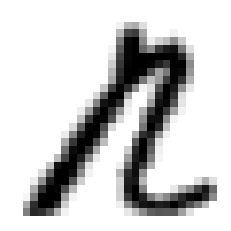

In [11]:
show_character(X_train, 1)

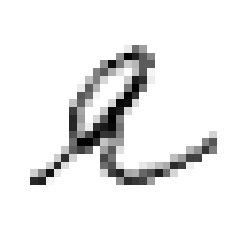

In [12]:
show_character(X_train, 100)

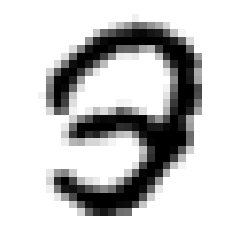

In [13]:
show_character(X_train, -1)

Can you identify those letters? Play around a bit and get comfortable with this code. 

Now we can make a grid of some of these letters to get a bigger picture. This code takes the first 10 images from the `X_train` dataframe and shows them. 

(0.0, 1.0, 27.5, -0.5)

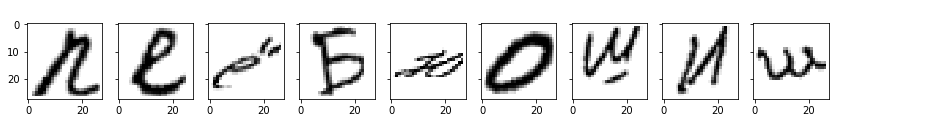

In [14]:
fig, ax = plt.subplots(1,10, sharex='col', sharey='row', figsize=(16,2))
for i in range(1,10):
    some_digit = X_train.iloc[i-1:i].values
    some_digit_image = some_digit.reshape(28, 28)
    ax[i-1].imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

## Where to go from here?

You should have everything you need to get started! Here are a few questions you could ask:

- Are the classes balanced?
- Could you do something to the images that would make the model work better?

But I will leave it up to you! Good luck!

- X_train - Our training data. Each row represents a different image. Each image is 28 pixels by 28 pixels (28 x 28 = 784)
- y_train - The corresponding true labels for the X_train dataset. There are 66 classes in this dataset (more on that later)
- X_test - The X values for our test set. This is what predictions will be made from.

# Random Forest 

At first, I downloaded packages that are used for classification.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm

I am going to use that method to improve predictive accuracy and control over-fitting. 

In [16]:
clf = RandomForestClassifier(verbose = 10,
                             random_state=42,
                             n_estimators = 210,
                            n_jobs = 1)

I decided to build 210 trees because of my memory usage.

In [17]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 210


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


building tree 2 of 210


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.6s remaining:    0.0s


building tree 3 of 210


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.4s remaining:    0.0s


building tree 4 of 210


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.2s remaining:    0.0s


building tree 5 of 210


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.7s remaining:    0.0s


building tree 6 of 210


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   39.3s remaining:    0.0s


building tree 7 of 210


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   45.5s remaining:    0.0s


building tree 8 of 210


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   52.1s remaining:    0.0s


building tree 9 of 210


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   58.2s remaining:    0.0s


building tree 10 of 210
building tree 11 of 210
building tree 12 of 210
building tree 13 of 210
building tree 14 of 210
building tree 15 of 210
building tree 16 of 210
building tree 17 of 210
building tree 18 of 210
building tree 19 of 210
building tree 20 of 210
building tree 21 of 210
building tree 22 of 210
building tree 23 of 210
building tree 24 of 210
building tree 25 of 210
building tree 26 of 210
building tree 27 of 210
building tree 28 of 210
building tree 29 of 210
building tree 30 of 210
building tree 31 of 210
building tree 32 of 210
building tree 33 of 210
building tree 34 of 210
building tree 35 of 210
building tree 36 of 210
building tree 37 of 210
building tree 38 of 210
building tree 39 of 210
building tree 40 of 210
building tree 41 of 210
building tree 42 of 210
building tree 43 of 210
building tree 44 of 210
building tree 45 of 210
building tree 46 of 210
building tree 47 of 210
building tree 48 of 210
building tree 49 of 210
building tree 50 of 210
building tree 51

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed: 23.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=210, n_jobs=1,
                       oob_score=False, random_state=42, verbose=10,
                       warm_start=False)

In [18]:
model = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   14.2s finished


In [19]:
metrics.f1_score(y_test, model, average='micro')

0.7211880711880713

In [21]:
final = clf.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   29.5s finished


In [25]:
df = pd.DataFrame(final, columns =['label'])

In [26]:
test = test.reset_index()

In [27]:
result = pd.merge(test[['id']],
                  df[['label']],
                  left_index = True,
                  right_index = True)

In [28]:
result.to_csv("clf.csv", 
              index = None, 
              sep = ",",
              header = True)

#  Multilayer Perceptron

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(20), random_state=42, verbose = True)

In [ ]:
mlp.fit(X_train, y_train.values.ravel())

Iteration 1, loss = inf
Iteration 2, loss = 3.61825045
Iteration 3, loss = 3.18106985
Iteration 4, loss = 2.88592069
Iteration 5, loss = 2.56285903
Iteration 6, loss = 2.32842094
Iteration 7, loss = 2.22301213
Iteration 8, loss = 2.16348560
Iteration 9, loss = 2.11653205
Iteration 10, loss = 2.08821640
Iteration 11, loss = 2.06959977
Iteration 12, loss = 2.05312647
Iteration 13, loss = 2.03623888
Iteration 14, loss = 2.01705513
Iteration 15, loss = 2.00346646
Iteration 16, loss = 1.98269795
Iteration 17, loss = 1.96934735
Iteration 18, loss = 1.96317148
Iteration 19, loss = 1.95502371
Iteration 20, loss = 1.94754968
Iteration 21, loss = 1.94192360
Iteration 22, loss = 1.93159015
Iteration 23, loss = 1.92640872
Iteration 24, loss = 1.92080831
Iteration 25, loss = 1.91851859
Iteration 26, loss = 1.90723442
Iteration 27, loss = 1.90330062
Iteration 28, loss = 1.90033451
Iteration 29, loss = 1.89627643
Iteration 30, loss = 1.89035801
Iteration 31, loss = 1.88763877
Iteration 32, loss = 1.8

In [26]:
model1 = mlp.predict(X_test)

In [30]:
metrics.f1_score(y_test, model1, average='micro')

0.13773792345220917

# Decision Tree

It will be used to make a classification. The reason why I am trying to use this method is: It requires relatively less effort for training the algorithm.

In [19]:
clf1 = tree.DecisionTreeClassifier(random_state=42)
                        


In [21]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [22]:
model2 = clf1.predict(X_test)

In [23]:
metrics.f1_score(y_test,
                 model2,
                 average="micro")

0.36957671957671956